## Exercise 01: Predict breast cancer

Load the **breast_cancer** dataset in `sklearn.datasets.load_breast_cancer` and play with different classification models to get the best possible cancer estimator

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_score, recall_score

In [3]:
data = load_breast_cancer()

In [4]:
X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"], name="is_benign")
data = pd.concat([X, y], axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Some EDA

### Check the *a-priori* probability of cancer

In [6]:
data.is_benign.value_counts()

is_benign
1    357
0    212
Name: count, dtype: int64

In [7]:
px.pie(data, names="is_benign", template="none", title="A-priori probability of having malignant/benign cancer")

### Calculate correlations between variables (and target)

In [8]:
import plotly.figure_factory as ff

In [9]:
df_corr = data.corr()
xx = list(df_corr.columns)
yy = list(df_corr.index)
zz = np.array(df_corr)

fig = ff.create_annotated_heatmap(
    zz,
    x = xx,
    y = yy ,
    annotation_text = np.around(zz, decimals=2),
    hoverinfo='z',
    colorscale='RdBu'
)

fig.update_layout(
    height=1000
)

We have extracted very interesting information from this analysis:
 - The target is highly correlated with several variables like *radius*, *perimeter* *area*, *concavity*, ...
 - Several of these *important* variables seem to be correlated as well between themselves

### Plot the univariate distribution of features 

In [10]:
def plot_univariate_hist(feature_name):
    return px.histogram(data, x=feature_name, nbins=100, color="is_benign", marginal="box", template="none", title=f"Histogram: {feature_name}", histnorm="probability density")

In [11]:
plot_univariate_hist("worst concave points")

## Pre-processing

### Train/Test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [13]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,12.48,37.16,82.28,474.2,0.12980,0.2517,0.36300,0.09653,0.2112,0.08732
295,13.77,13.27,88.06,582.7,0.09198,0.06221,0.01063,0.01917,0.1592,0.05912,...,14.67,16.93,94.17,661.1,0.11700,0.1072,0.03732,0.05802,0.2823,0.06794
264,17.19,22.07,111.60,928.3,0.09726,0.08995,0.09061,0.06527,0.1867,0.05580,...,21.58,29.33,140.50,1436.0,0.15580,0.2567,0.38890,0.19840,0.3216,0.07570
125,13.85,17.21,88.44,588.7,0.08785,0.06136,0.01420,0.01141,0.1614,0.05890,...,15.49,23.58,100.30,725.9,0.11570,0.1350,0.08115,0.05104,0.2364,0.07182
280,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,0.1902,0.06220,...,23.72,35.90,159.80,1724.0,0.17820,0.3841,0.57540,0.18720,0.3258,0.09720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,11.60,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.03350,0.1620,0.06582,...,13.06,17.16,82.96,512.5,0.14310,0.1851,0.19220,0.08449,0.2772,0.08756
322,12.86,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.03400,0.1543,0.06476,...,14.04,21.08,92.80,599.5,0.15470,0.2231,0.17910,0.11550,0.2382,0.08553
382,12.05,22.72,78.75,447.8,0.06935,0.10730,0.07943,0.02978,0.1203,0.06659,...,12.57,28.71,87.36,488.4,0.08799,0.3214,0.29120,0.10920,0.2191,0.09349
365,20.44,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.07785,0.1618,0.05557,...,24.31,26.37,161.20,1780.0,0.13270,0.2376,0.27020,0.17650,0.2609,0.06735


### Feature selection (optional)

Example: select those feature with a correlation higher than 0.8 with the target

In [37]:
features = df_corr.is_benign.abs().sort_values(ascending=False)[1:].index

In [38]:
# Remove collinearities
threshold = 0.8
ffeatures = set(features)
for feat in features:
    if feat in ffeatures:
        most_corr = set(df_corr.abs()[feat][df_corr[feat] > threshold].sort_values(ascending=False)[1:].index)
        ffeatures.difference_update(most_corr)

In [39]:
features = list(ffeatures)

In [40]:
X_train = X_train[features]
X_test = X_test[features]

In [41]:
features

['symmetry error',
 'concave points error',
 'mean fractal dimension',
 'worst texture',
 'worst fractal dimension',
 'texture error',
 'mean symmetry',
 'worst smoothness',
 'compactness error',
 'smoothness error',
 'worst concave points',
 'radius error',
 'worst radius',
 'worst symmetry']

### Build Standard Scaler

In [43]:
sc = StandardScaler()

In [44]:
X_train_sc = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test), columns=X_train.columns)

## Algorithms

In [45]:
evaluation = {}

### **Logistic Regression**

In [46]:
from sklearn.linear_model import LogisticRegression

#### Model definition

In [47]:
clf = LogisticRegression(
    penalty="l2",     # Regularization: Type of regularization to apply to the model
    solver="liblinear"
)

#### Fit model to data

In [48]:
clf.fit(
    X_train_sc,         # Features
    y_train          # Target
)

LogisticRegression(solver='liblinear')

#### Make predictions over new data

In [49]:
y_test_pred = clf.predict(X_test_sc)          # This is the hard output

#### Extract probabilities

In [50]:
y_test_proba = clf.predict_proba(X_test_sc)   # This is the soft output

#### Evaluate model

In [51]:
rep = classification_report(y_test, y_test_pred, output_dict=True)
rocauc = roc_auc_score(y_test, y_test_proba[:,1])
fpr,tpr,_ = roc_curve(y_test, y_test_proba[:,1])

In [52]:
evaluation.update({
    "logistic_regression": {
        "report": rep["1"],
        "roc": {
            "fpr": fpr,
            "tpr": tpr,
            "auc": rocauc
        },
        "y_test_proba": y_test_proba
    }
})

### **Decission Trees**

In [53]:
from sklearn.tree import DecisionTreeClassifier

#### Model definition

In [54]:
clf = DecisionTreeClassifier(
    criterion='gini',          # The criteria to measure the quality of a split. Leave as "gini"
    max_depth=2,            # The maximum number of levels (depth) of the resulting tree. The more depth, the more complex (and the more risk of overfitting)
    min_samples_split=2,       # The minimum number of samples if a leaf to promote for splitting. The smaller this number, the more complex (and the more risk of overfitting)
    min_samples_leaf=1,        # The minimum number of samples in a terminal leaf of any branch. The smaller this number, the more complex (and the more risk of overfitting)
)

#### Fit model to data

In [55]:
clf.fit(
    X_train,         # Features
    y_train          # Target
)

DecisionTreeClassifier(max_depth=2)

In [56]:
clf.tree_.max_depth

2

#### Make predictions over new data

In [57]:
y_test_pred = clf.predict(X_test)          # This is the hard output

#### Extract probabilities

In [58]:
y_test_proba = clf.predict_proba(X_test)   # This is the soft output

#### Calculate score

In [59]:
rep = classification_report(y_test, y_test_pred, output_dict=True)
rocauc = roc_auc_score(y_test, y_test_proba[:,1])
fpr,tpr,_ = roc_curve(y_test, y_test_proba[:,1])

In [60]:
evaluation.update({
    "decision_tree": {
        "report": rep["1"],
        "roc": {
            "fpr": fpr,
            "tpr": tpr,
            "auc": rocauc
        },
        "y_test_proba": y_test_proba
    }
})

### Print the tree

In [61]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

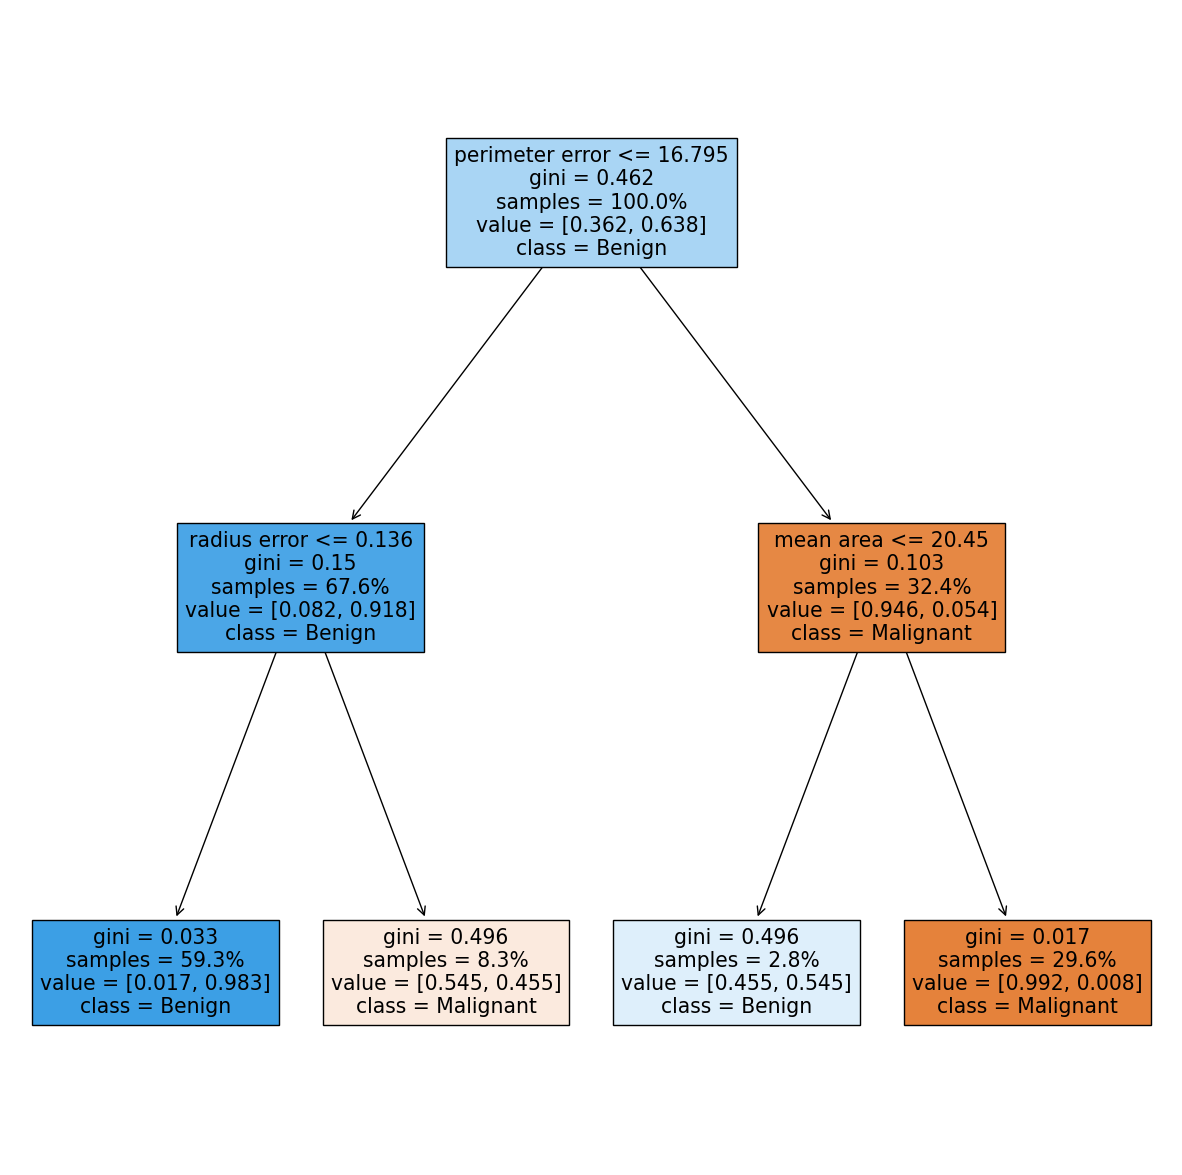

In [62]:
_,ax = plt.subplots(figsize=(15,15))
plot_tree(clf, max_depth=3, ax=ax, feature_names=X.columns.tolist(), class_names=["Malignant","Benign"], proportion=True, filled=True)
pass

### **Support Vector Machines**

#### Non-linear Kernel

In [63]:
from sklearn.svm import SVC

##### Model definition

In [64]:
clf = SVC(
    C=1.0,            # Regularization: The regularization parameter. The smaller, the stronger the regularization applied.
    kernel='rbf',     # The non-linear kernel to apply to the SVM
    probability=True  # Enable the SVM to calculate probabilities. This is not native, but an additional algorithm to provide this functionality
)

##### Fit model to data

In [65]:
clf.fit(
    X_train_sc,         # Features
    y_train          # Target
)

SVC(probability=True)

##### Make predictions over new data

In [66]:
y_test_pred = clf.predict(X_test_sc)          # This is the hard output

##### Extract probabilities

In [67]:
y_test_proba = clf.predict_proba(X_test_sc)   # This is the soft output

##### Calculate score

In [68]:
rep = classification_report(y_test, y_test_pred, output_dict=True)
rocauc = roc_auc_score(y_test, y_test_proba[:,1])
fpr,tpr,_ = roc_curve(y_test, y_test_proba[:,1])

In [69]:
evaluation.update({
    "svm": {
        "report": rep["1"],
        "roc": {
            "fpr": fpr,
            "tpr": tpr,
            "auc": rocauc
        },
        "y_test_proba": y_test_proba
    }
})

In [70]:
def plot_prec_rec_th(model):
    y_test_proba = evaluation[model]["y_test_proba"]

    thresholds = np.linspace(0,1,1000)

    precs = []
    recs = []
    for th in thresholds:
        precs.append(precision_score(y_test.astype(float), (y_test_proba[:,1] >= th).astype(float)))
        recs.append(recall_score(y_test.astype(float), (y_test_proba[:,1] >= th).astype(float)))

    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=thresholds,
        y=precs,
        name="Precision",
        line_width=3
    ))
    fig.add_trace(go.Scatter(
        x=thresholds,
        y=recs,
        name="Recall",
        line_width=3
    ))

    return fig.update_layout(title=f"Precision-Recall-Threshold ({model})", xaxis_title="Threshold", yaxis_title="Precision / Recall", hovermode="x", template="none")

## Evaluation

In [71]:
plot_prec_rec_th("svm")

c:\Users\dasir\anaconda3\envs\pda-ie\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

